In [1]:
using Reduce
@force using Reduce.Algebra

In [2]:
function curvepoints(expressions, exprvar, trange)
    rangelen = length(trange)
    domaindim = length(expressions)
    points = zeros(Float64, (rangelen, domaindim))

    for i in 1:rangelen
        eval(:($exprvar = $(trange[i])))
        points[i, :] = eval.(expressions)
        #points[i, :] = eval.(sub.((Dict(exprvar => trange[i]),), expressions))
    end

    return points
end

function slowcurvepoints(expressions, exprvar, trange)
    rangelen = length(trange)
    domaindim = length(expressions)
    points = zeros(Float64, (rangelen, domaindim))

    for i in 1:rangelen
        points[i, :] = eval.(sub.((Dict(exprvar => trange[i]),), expressions))
    end

    return points
end

slowcurvepoints (generic function with 1 method)

In [3]:
df(:x, :x)
function curvevectors(expressions, exprvar, tvalues)
    valueslen = length(tvalues)
    domaindim = length(expressions)
    vectors = zeros(Float64, (valueslen*3, domaindim))

    derivatives = df.(expressions, exprvar)

    for i in 1:valueslen
        eval(:($exprvar = $(tvalues[i])))

        e_expr = eval.(expressions)
        e_derv = eval.(derivatives)
        
        vectors[(i-1)*3 + 1, :] = e_expr
        vectors[(i-1)*3 + 2, :] = e_expr + e_derv
        vectors[(i-1)*3 + 3, :] = fill(NaN, (1, domaindim))
    end

    return vectors
end

curvevectors (generic function with 1 method)

In [6]:
curve = [:(cos(t) * log(t+1)), :(sin(t) * log(t+1))]

2-element Vector{Expr}:
 :(cos(t) * log(t + 1))
 :(sin(t) * log(t + 1))

In [9]:
@time cpnts = curvepoints(curve, :t, range(0, 30*π, length=1500));

  0.972030 seconds (237.99 k allocations: 11.414 MiB, 1.30% gc time)


In [14]:
@time cvecs = curvevectors(curve, :t, range(0, 30*π, length=500));

  0.908640 seconds (163.58 k allocations: 8.628 MiB)


In [4]:
using Plots

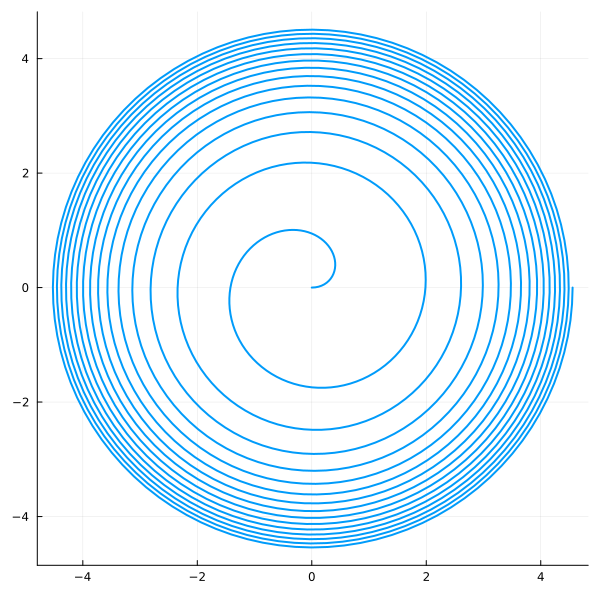

In [12]:
plot(
    (cpnts[:,1], cpnts[:,2]);
    
    linewidth=2,
    size=(600,600),
    label="",
    aspect_ratio=1
)

In [ ]:
savefig("TrbA1/sprl1.png")

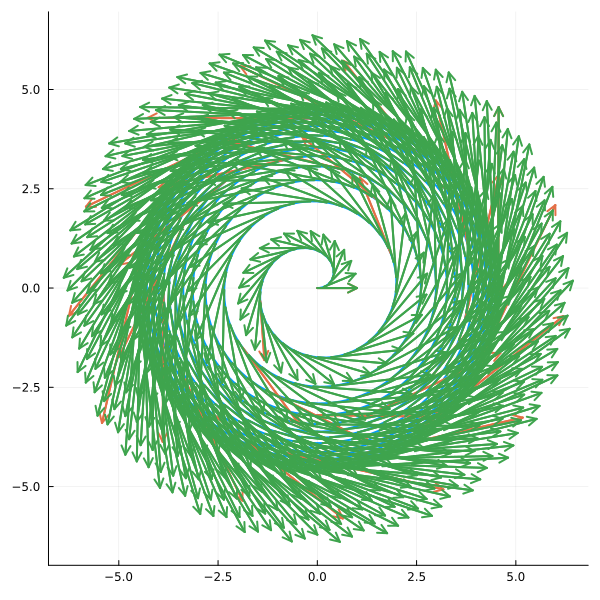

In [15]:
plot!(
    (cvecs[:,1], cvecs[:,2]);
    
    linewidth=2,
    arrow=true,
    label=""
)

In [ ]:
savefig("TrbA1/sprl2.png")

In [80]:
curved1t = df.(curve, :t)
curvelen = int(sqrt(curved1t[1]^2 + curved1t[2]^2), :t)
curvelen = :(trigsimp($curvelen)) |> rcall

:(int(sqrt((t ^ 2 + 2t + 1) * log(t + 1) ^ 2 + 1) / abs(t + 1), t))

In [12]:
circexpr = [:(r*cos(t)), :(r*sin(t))]

2-element Vector{Expr}:
 :(r * cos(t))
 :(r * sin(t))

In [13]:
circexprd1t = df.(circexpr, :t)

2-element Vector{Expr}:
 :(-(sin(t)) * r)
 :(cos(t) * r)

In [14]:
circexprd2t = df.(circexpr, :t, 2)

2-element Vector{Expr}:
 :(-(cos(t)) * r)
 :(-(sin(t)) * r)

In [17]:
:(trigsimp(sqrt($(circexprd1t[1])^2 + $(circexprd1t[2])^2))) |> rcall

:(abs(r))

In [37]:
t = :(s/r)
circexpr = [:(r*cos($t)), :(r*sin($t))]
circexprd1t = df.(circexpr, :s)
circexprd2t = df.(circexpr, :s, 2)

2-element Vector{Expr}:
 :(-(cos(s / r)) / r)
 :(-(sin(s / r)) / r)

In [38]:
:(trigsimp(sqrt($(circexprd1t[1])^2 + $(circexprd1t[2])^2))) |> rcall

1

In [39]:
:(trigsimp(sqrt($(circexprd2t[1])^2 + $(circexprd2t[2])^2))) |> rcall

:(1 / abs(r))

In [5]:
curve3d = [:(cos(t) * log(t+1)), :(sin(t) * log(t+1)), :(t)]

3-element Vector{Any}:
 :(cos(t) * log(t + 1))
 :(sin(t) * log(t + 1))
 :t

In [6]:
curve3dpnts = curvepoints(curve3d, :t, range(0, 30*π, length=1500))
curve3dvecs = curvevectors(curve3d, :t, range(0, 30*π, length=1500))

4500×3 Matrix{Float64}:
   0.0          0.0           0.0
   1.0          0.0           1.0
 NaN          NaN           NaN
   0.0608559    0.00383129    0.0628738
   0.996011     0.123803      1.06287
 NaN          NaN           NaN
   0.117512     0.0148552     0.125748
   0.983942     0.243775      1.12575
 NaN          NaN           NaN
   0.169729     0.0323997     0.188621
   0.963719     0.359879      1.18862
 NaN          NaN           NaN
   0.217282     0.0558272     0.251495
   ⋮                        
   4.47372     -0.853991     94.0592
   5.33804      3.61776      95.0592
 NaN          NaN           NaN
   4.51919     -0.571292     94.122
   5.10092      3.94658      95.122
 NaN          NaN           NaN
   4.54682     -0.286253     94.1849
   4.84356      4.25991      95.1849
 NaN          NaN           NaN
   4.55648     -4.9116e-14   94.2478
   4.56698      4.55648      95.2478
 NaN          NaN           NaN

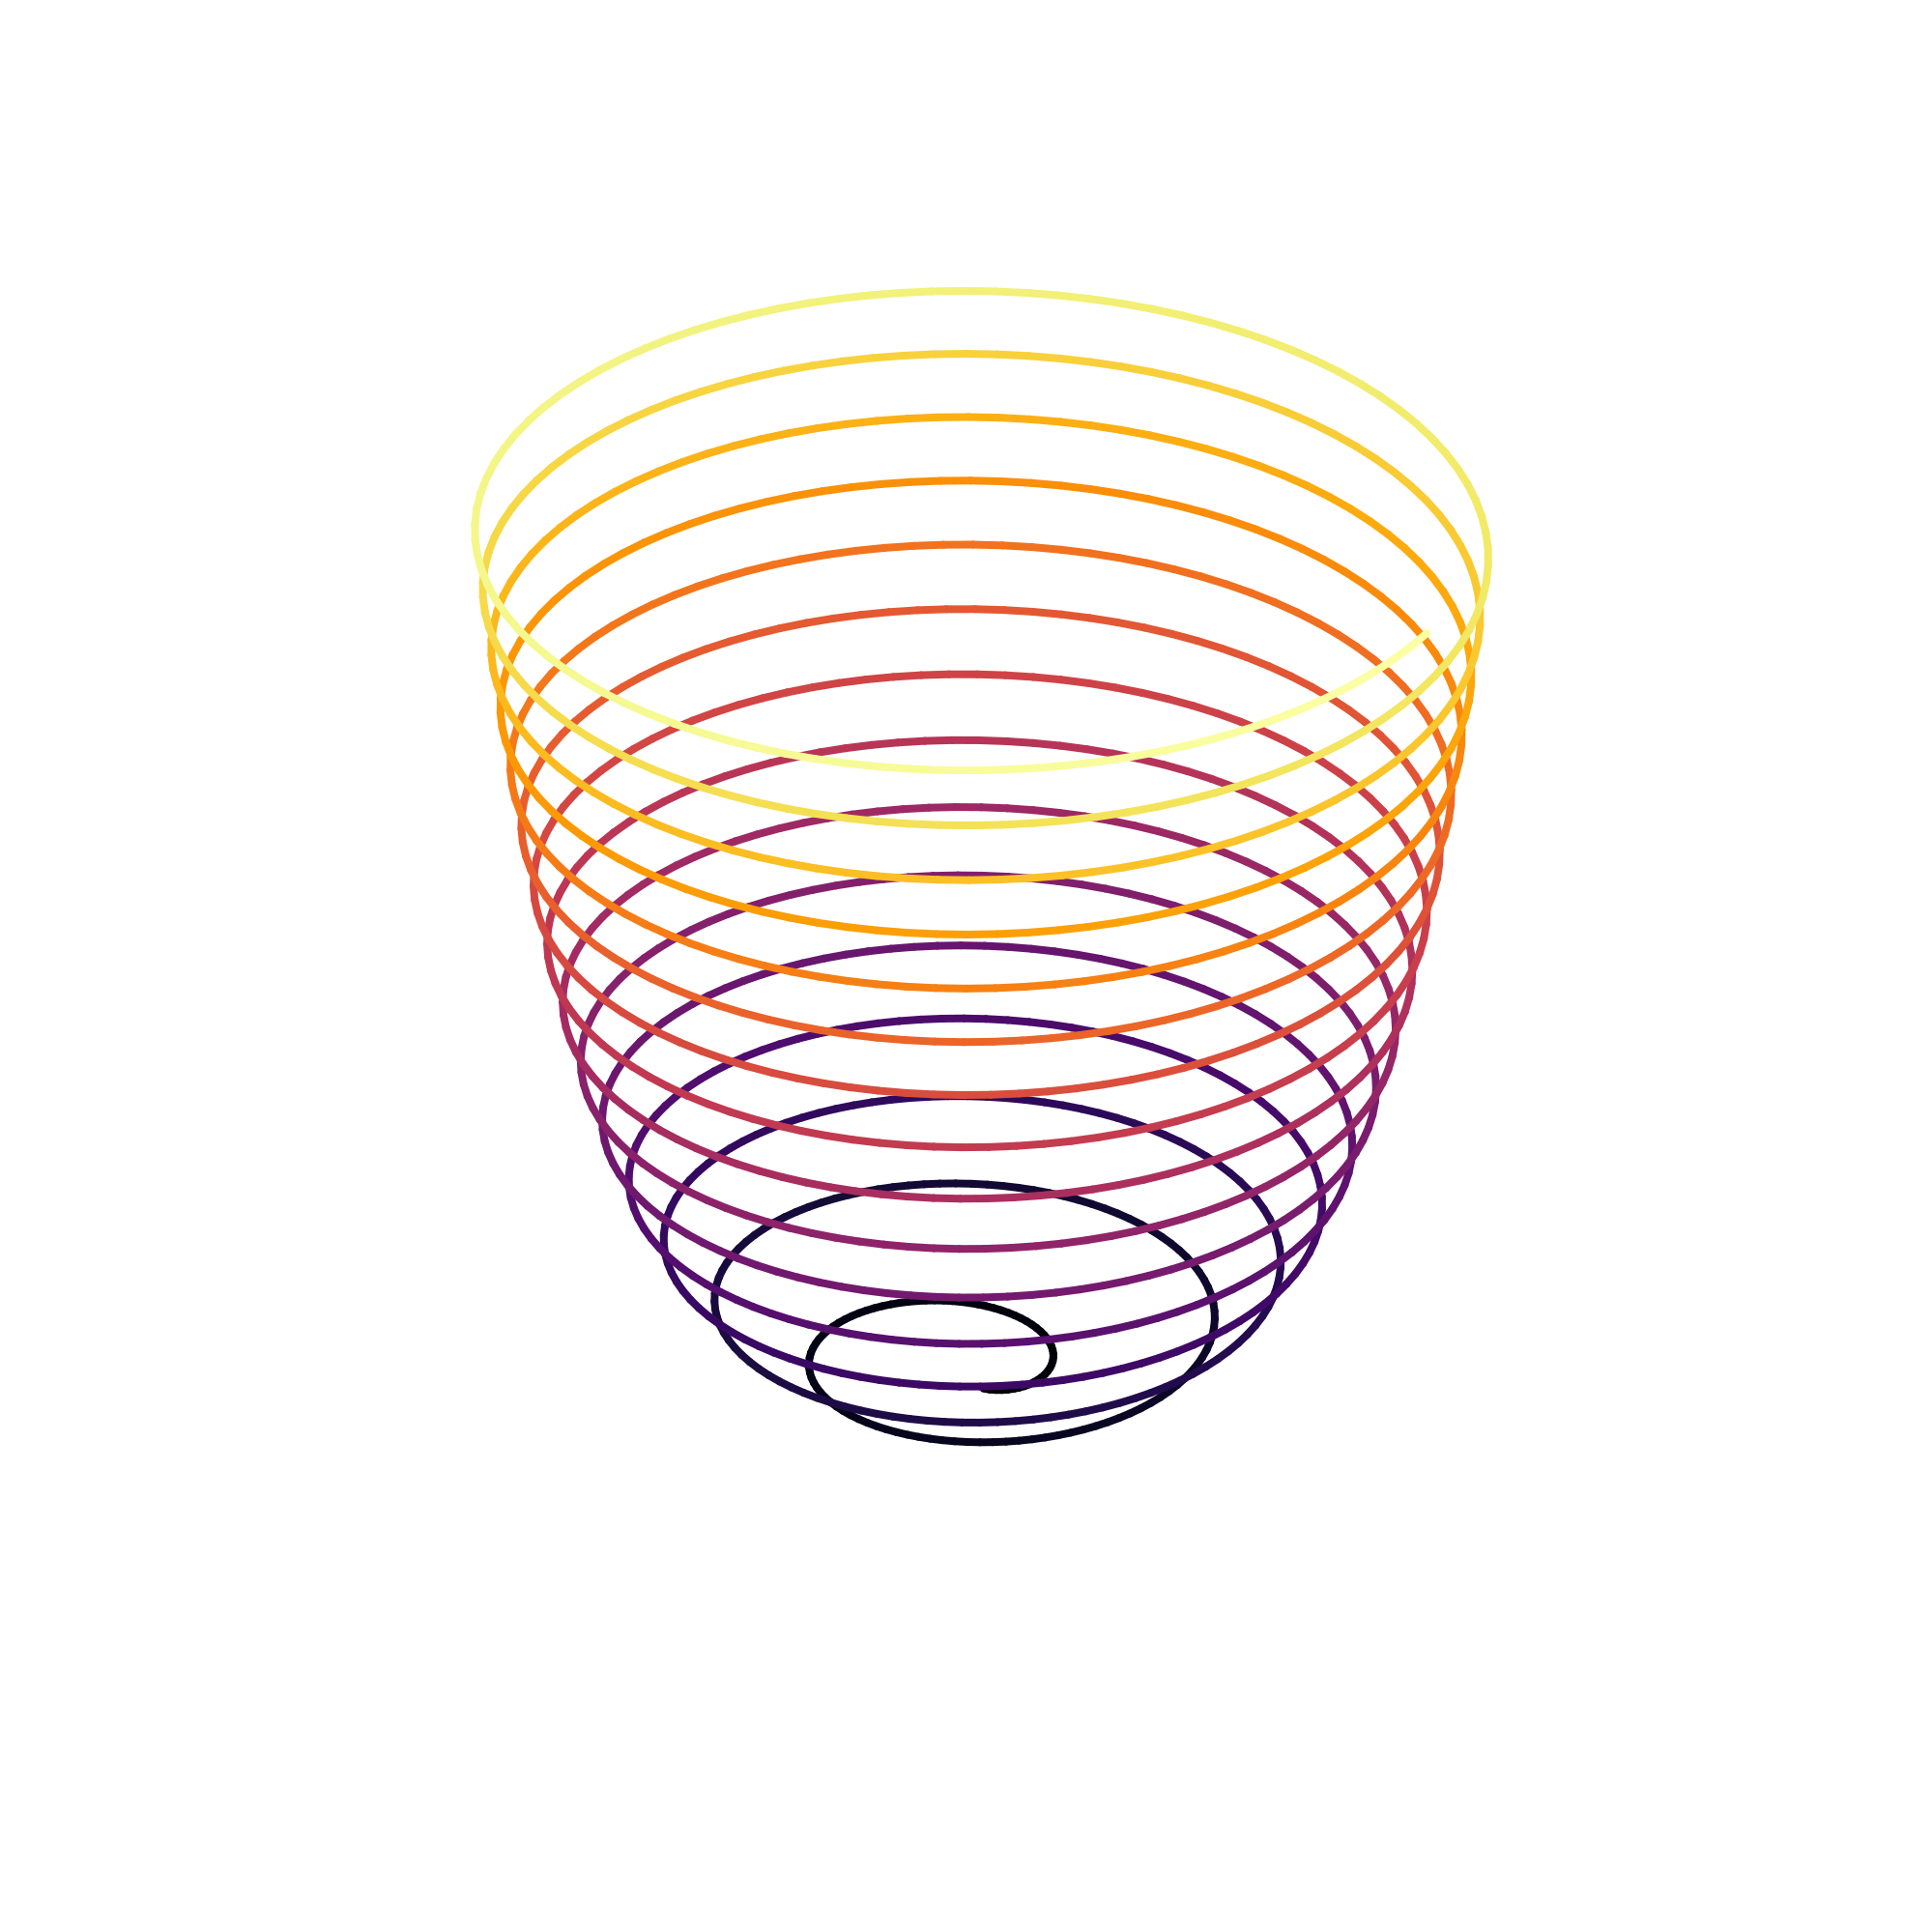

In [20]:
plot(
    (curve3dpnts[:,1], curve3dpnts[:,2], curve3dpnts[:,3]);
    
    linewidth=8,
    size=(2000,2000),
    label="",
    aspect_ratio=1,
    seriescolor=:inferno,
    line_z=f(x,y,z) = z,
    colorbar_entry=false,
    axis=false,
    grid=false
)

In [21]:
savefig("TrbA1/cover.png")

"/home/osmar/FGV/CurvSurf/CurvyCurves/TrbA1/cover.png"

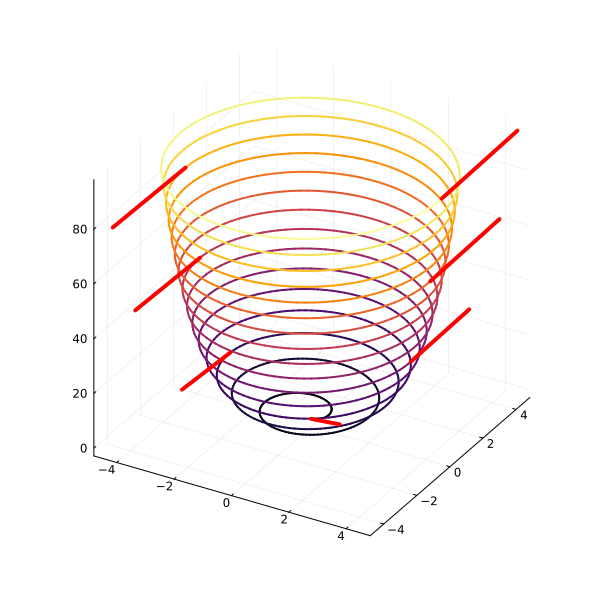

In [9]:
plot!(
    (curve3dvecs[:,1], curve3dvecs[:,2], curve3dvecs[:,3]);
    
    linewidth=4,
    seriescolor=:red,
    arrow=Plots.Arrow(:closed, :head, 5, 5),
    label=""
)

In [29]:
anim = @animate for i=range(1, 1500, step=30)
    plot(
    curve3dpnts[1:i, 1], curve3dpnts[1:i, 2], curve3dpnts[1:i, 3];
    
    linewidth=2,
    size=(600,600),
    label="",
    aspect_ratio=1,
    seriescolor=:inferno,
    line_z=f(x,y,z) = z,
    colorbar_entry=false,
    xlim=(-5,5),
    ylim=(-5,5),
    zlim=(0,100)
)
end

Animation("/tmp/jl_8R1it7", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

[ Info: Saved animation to /home/osmar/FGV/CurvSurf/CurvyCurves/3dspiral.gif


Plots.AnimatedGif("/home/osmar/FGV/CurvSurf/CurvyCurves/3dspiral.gif")
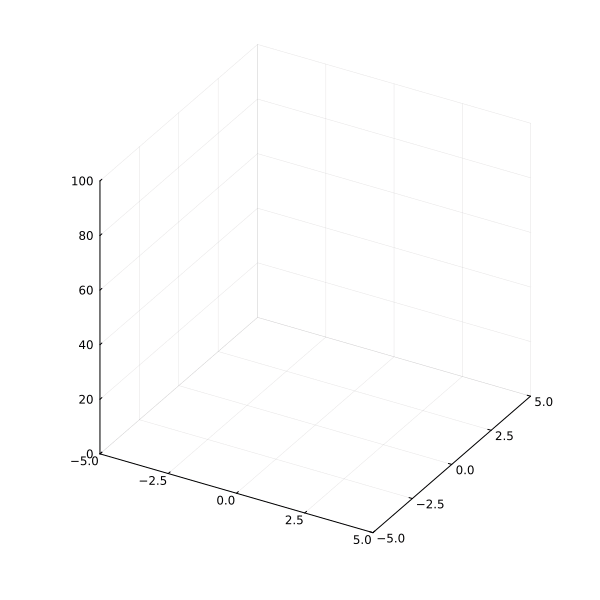

In [30]:
gif(anim, "3dspiral.gif")